In [102]:
import pandas as pd 
import numpy as np 
import requests 


In [103]:
numero_de_paginas = 5
near_earth_objects = []

for numero in range(1, numero_de_paginas + 1):
    url="https://api.nasa.gov/neo/rest/v1/neo/browse?page={numero}&api_key=rsTSh621hbpy9PYSGpOdfvQIsobKdfja2EtMB2HW"
    respone=requests.get(url)
    data=resp.json()
    near_earth_objects += data["near_earth_objects"]

In [104]:
# url="https://api.nasa.gov/neo/rest/v1/neo/browse?page=0&api_key=rsTSh621hbpy9PYSGpOdfvQIsobKdfja2EtMB2HW"

In [105]:
# resp = requests.get(url)

In [106]:
# data = resp.json() # retornar o formato da resposta como um json
# ja faz onversão para um dicionario do python

In [107]:
data.keys() # vai retornar as chaves

dict_keys(['links', 'page', 'near_earth_objects'])

In [108]:
data['page']

{'size': 20, 'total_elements': 25981, 'total_pages': 1300, 'number': 0}

In [187]:
data['near_earth_objects'] # virá o conjunto de todos os asteroides

In [110]:
data['near_earth_objects'][0]['name'] # para saber o nome do asteroide no indice

'433 Eros (A898 PA)'

In [111]:
asteroids = {"id": [], "nome": [], "perigoso": [], "diametro_min": [], "diametro_max": [], "primeira_obs": [], "ultima_obs": []} 
# dict para criar dataset no pandas

In [112]:
for asteroid in data['near_earth_objects']:
    asteroids['id'].append(asteroid['id'])
    asteroids['nome'].append(asteroid['name'])
    asteroids['perigoso'].append(asteroid['is_potentially_hazardous_asteroid'])
    asteroids['diametro_min'].append(asteroid['estimated_diameter']['kilometers']['estimated_diameter_min'])
    asteroids['diametro_max'].append(asteroid['estimated_diameter']['kilometers']['estimated_diameter_max'])
    asteroids['primeira_obs'].append(asteroid['orbital_data']['first_observation_date'])
    asteroids['ultima_obs'].append(asteroid['orbital_data']['last_observation_date'])

In [188]:
asteroids # retornará os dados 

In [114]:
asteroids_data = pd.DataFrame(asteroids, index=asteroids["id"], columns=['nome', 'primeira_obs', 'ultima_obs', 'diametro_min', 'diametro_max', 'perigoso'])

#pode dar erro de tamanho, verificar duas sessos acima se rodou mais de 1 vez

In [115]:
asteroids_data.head()

,nome,primeira_obs,ultima_obs,diametro_min,diametro_max,perigoso
2000433,433 Eros (A898 PA),1893-10-29,2020-09-03,21.905591,48.982391,False
2000719,719 Albert (A911 TB),1911-10-04,2021-04-17,2.101624,4.699374,False
2000887,887 Alinda (A918 AA),1918-02-03,2021-05-23,4.534767,10.140047,False
2001036,1036 Ganymed (A924 UB),1924-10-23,2021-05-20,37.545248,83.953727,False
2001221,1221 Amor (1932 EA1),1932-03-12,2020-09-14,0.884209,1.977152,False


In [116]:
asteroids_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 2000433 to 2001980
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nome          20 non-null     object 
 1   primeira_obs  20 non-null     object 
 2   ultima_obs    20 non-null     object 
 3   diametro_min  20 non-null     float64
 4   diametro_max  20 non-null     float64
 5   perigoso      20 non-null     bool   
dtypes: bool(1), float64(2), object(3)
memory usage: 980.0+ bytes


In [117]:
asteroids_data['perigoso'].describe()

count        20
unique        2
top       False
freq         17
Name: perigoso, dtype: object

In [118]:
# Criar uma lista para receber os dados de aproximação de cada asteroide

close_approach_date_list = []

for item in near_earth_objects:
    if "close_approach_data" in item:
        close_approach_date_list.append((item["id"], item["close_approach_data"]))
        del item["close_approach_data"]
# O item close_approach_data é uma lista de dicionarios de dados de aproximação
# Deletar essa lista do dicionário near_earth_objects, pra não ficar em df

In [119]:
# Gerar um dataframe com os dados de aproximação, a função json_normalize é usada para fazer um flat no dicionário
# Faz com que todos os subdicionarios sejam trazidos para o primeiro nível
# o novo nome será algo como key_keyinterna

df = pd.json_normalize(near_earth_objects, sep='_')

In [120]:
df.head()

,id,neo_reference_id,name,name_limited,designation,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,links_self,...,orbital_data_perihelion_distance,orbital_data_perihelion_argument,orbital_data_aphelion_distance,orbital_data_perihelion_time,orbital_data_mean_anomaly,orbital_data_mean_motion,orbital_data_equinox,orbital_data_orbit_class_orbit_class_type,orbital_data_orbit_class_orbit_class_description,orbital_data_orbit_class_orbit_class_range
0,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.42,False,False,http://www.neowsapp.com/rest/v1/neo/2000433?ap...,...,1.133004742235244,178.8689344136611,1.783329732710202,2459159.335547096931,23.04174772806651,.5597486691326496,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
1,2000719,2000719,719 Albert (A911 TB),Albert,719,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000719,15.51,False,False,http://www.neowsapp.com/rest/v1/neo/2000719?ap...,...,1.195921798940758,156.1912159703744,4.080833383699515,2459956.015639686394,186.2430805612125,.2299845434184686,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
2,2000887,2000887,887 Alinda (A918 AA),Alinda,887,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000887,13.84,False,False,http://www.neowsapp.com/rest/v1/neo/2000887?ap...,...,1.062574649224249,350.5125087573783,3.884492912785256,2459258.743607733975,345.2437646475034,.253353731449726,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
3,2001036,2001036,1036 Ganymed (A924 UB),Ganymed,1036,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001036,9.25,False,False,http://www.neowsapp.com/rest/v1/neo/2001036?ap...,...,1.244392487592923,132.3785381720509,4.085994582878027,2458979.250423075115,50.11796125710877,.226522291946004,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
4,2001221,2001221,1221 Amor (1932 EA1),Amor,1221,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001221,17.39,False,False,http://www.neowsapp.com/rest/v1/neo/2001221?ap...,...,1.083392203652344,26.67758290479227,2.7549388383389,2458896.584345836670,112.6648636168215,.3707109590224443,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU


In [189]:
# Verificar os objetos perigosos para a Terra através da série booleana abaixo:
perigosos = df["is_potentially_hazardous_asteroid"]

In [122]:
perigosos.value_counts()

False    85
True     15
Name: is_potentially_hazardous_asteroid, dtype: int64

In [139]:
# Distancia de avistamento dos objetos
# usar json normalize para trazer os id's dos asteroides para o mesmo nível, no subdicionario, que contém as informações de distância

# Implementar um flat manualmente, adicionar o ID do asteroide na lista de avistamentos, porque antes isso era descoberto por hierarquia,
# mas agora os dados de avistamento de todos os asteroides estão misturados. 
# Para saber a origem, foi adicionado o campo "id" para rastrear o asteróide. 

linhas = []

for id_asteroid, list_approach in close_approach_date_list:
    for item in list_approach:
        item["id"] = id_asteroid
        linhas.append(item)
        

# linhas é uma lista com dicionários que contém subdicionarios, também é necessário achatar os dicionários para ficar todos no primeiro nível.
df_approach = pd.json_normalize(linhas, sep='_')
df_approach.head()


,close_approach_date,close_approach_date_full,epoch_date_close_approach,orbiting_body,id,relative_velocity_kilometers_per_second,relative_velocity_kilometers_per_hour,relative_velocity_miles_per_hour,miss_distance_astronomical,miss_distance_lunar,miss_distance_kilometers,miss_distance_miles
0,1900-12-27,1900-Dec-27 01:30,-2177879400000,Earth,2000433,5.5786203614,20083.0333009607,12478.8158863664,0.3149291092,122.5074234788,47112723.937317404,29274489.1785480152
1,1907-11-05,1907-Nov-05 03:31,-1961526540000,Earth,2000433,4.3944903402,15820.1652245583,9830.0354418929,0.4714855144,183.4078651016,70533228.690094328,43827316.0083766064
2,1917-04-20,1917-Apr-20 21:19,-1663036860000,Earth,2000433,4.8167845832,17340.4244994036,10774.6654340878,0.4992572291,194.2110621199,74687818.055462017,46408858.1323171546
3,1924-03-05,1924-Mar-05 22:13,-1446083220000,Earth,2000433,4.5960536047,16545.7929768451,10280.9123083069,0.3597865248,139.9569581472,53823297.764782176,33444246.4007229888
4,1931-01-30,1931-Jan-30 04:07,-1228247580000,Earth,2000433,5.92081852,21314.9466719412,13244.2789473515,0.1740731641,67.7144608349,26040974.573520467,16181111.2718857646


In [140]:
# Criar lista dos asteroides potencialmente perigosos

id_perigosos = list(df["id"][perigosos])

In [143]:
#Para cada avistamento no dataframe df_approach verificar se o seu id está na lista dos id_perigosos, isso gera uma série booleana
perigosos_approach = df_approach["id"].apply(lambda x: x in id_perigosos)

In [144]:
# Selecionar as linhas de asteroides perigosos
df_approach_p = df_approach[:][perigosos_approach]

In [145]:
# Guardar a coluna miss_distance_kilometers em uma variável
distancias = df_approach_p["miss_distance_kilometers"]

In [147]:
# Transformar todos os valores da série distancias em float
distancias = distancias.apply(float)

In [148]:
# Imprimir a descrição estatística de distâncias dos objetos perigosos e a Terra
distancias.describe()

count    1.375000e+03
mean     3.623532e+07
std      2.125898e+07
min      1.242352e+06
25%      1.445085e+07
50%      3.626713e+07
75%      5.585698e+07
max      7.144171e+07
Name: miss_distance_kilometers, dtype: float64

In [150]:
# Transformar data de aproximação em datetime
import datetime

In [153]:
def str_to_date(data):
    if data != data:
        return data
    return datetime.datetime.strptime(data, '%Y-%m-%d') # data de avistamento string ===> objeto de datetime

In [155]:
df_approach["close_approach_date"] = df_approach["close_approach_date"].apply(str_to_date)

In [157]:
# Histograma mostrando quantos objetos perigosos tiveram aproximações com a terra por ano
# Definir intervalo

inicio = datetime.datetime.strptime('1994-01-01', '%Y-%m-%d')
fim = datetime.datetime.strptime('2012-01-01', '%Y-%m-%d')

In [159]:
# Gerar uma série booleana informando se a linha está ou não no intervalo de data desejado
intervalo = (inicio <= df_approach["close_approach_date"]) & (df_approach["close_approach_date"] < fim)

In [160]:
# Filtrar amostras dentro do intervalo

df_approach_intervalo = df_approach[:][intervalo]

In [161]:
# Criar uma coluna só com o número do ano

df_approach_intervalo["year"] = df_approach["close_approach_date"].apply(lambda x: x.year)

In [162]:
# Imprimir histograma

grupo = df_approach_intervalo[["id", "year"]]

array([[<AxesSubplot:title={'center':'year'}>]], dtype=object)

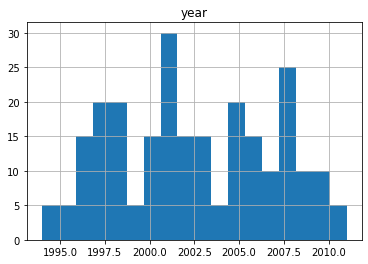

In [168]:
grupo.hist(bins=18)

In [169]:
# Histograma de tamanhos de objetos que são perigosos

df_perigosos = df[:][perigosos]

In [170]:
df_nao_perigosos = df[:][~perigosos]

In [171]:
# Criar dataframe só com id e diametro estimado maximo

df_diametro_perigosos = df_perigosos[["id", "estimated_diameter_kilometers_estimated_diameter_max"]]

In [172]:
df_diametro_nao_perigosos = df_nao_perigosos[["id", "estimated_diameter_kilometers_estimated_diameter_max"]]

array([[<AxesSubplot:title={'center':'estimated_diameter_kilometers_estimated_diameter_max'}>]],
      dtype=object)

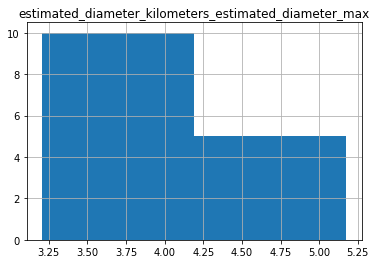

In [180]:
# Histograma de tamanhos de objetos que são perigosos;

df_diametro_perigosos.hist(bins=2)

array([[<AxesSubplot:title={'center':'estimated_diameter_kilometers_estimated_diameter_max'}>]],
      dtype=object)

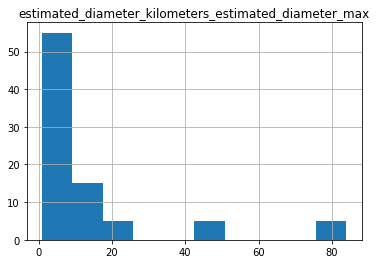

In [186]:
df_diametro_nao_perigosos.hist()